<a href="https://colab.research.google.com/github/Evan700/BDA/blob/main/ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Early Stopping

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4667 - val_loss: 0.3309
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3221 - val_loss: 0.3086
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3035 - val_loss: 0.2965
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2924 - val_loss: 0.2892
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2855 - val_loss: 0.2854
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2821 - val_loss: 0.2820
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2793 - val_loss: 0.2801
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2781 - val_loss: 0.2787
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2768 - val_loss: 0.2778
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2749 - val_loss: 0.2770
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2745 - val_loss: 0.2766
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

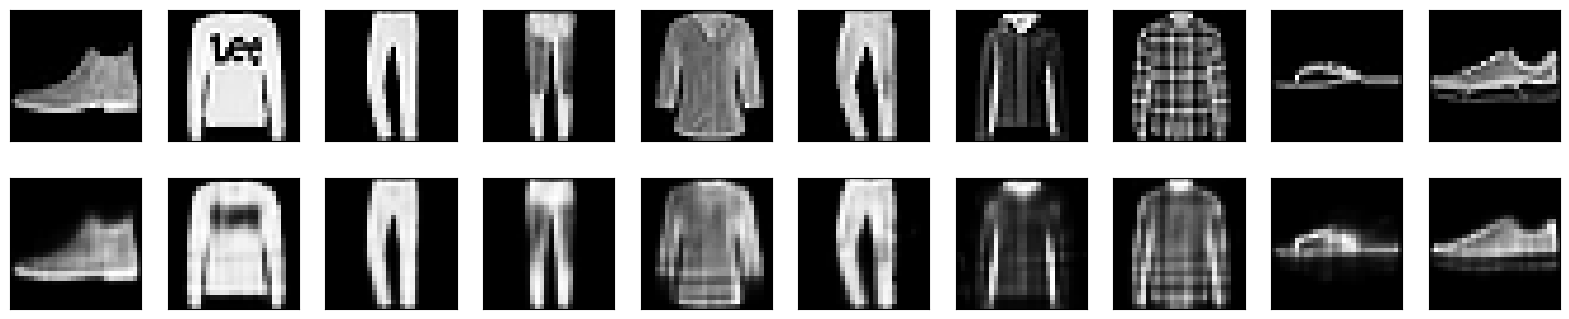

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 64    # Compress to 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model to best weights with the lowest validation loss


# Assuming x_train and x_test are your training and test datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])  # Add the early stopping callback

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Early Stopping Callback results: Stops at 89 epochs

# Terminate On NAN

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4672 - val_loss: 0.3264
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3191 - val_loss: 0.3064
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3017 - val_loss: 0.2953
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2910 - val_loss: 0.2885
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2860 - val_loss: 0.2846
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2815 - val_loss: 0.2821
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2790 - val_loss: 0.2804
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2779 - val_loss: 0.2791
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2769 - val_loss: 0.2781
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2761 - val_loss: 0.2773
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2751 - val_loss: 0.2765
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

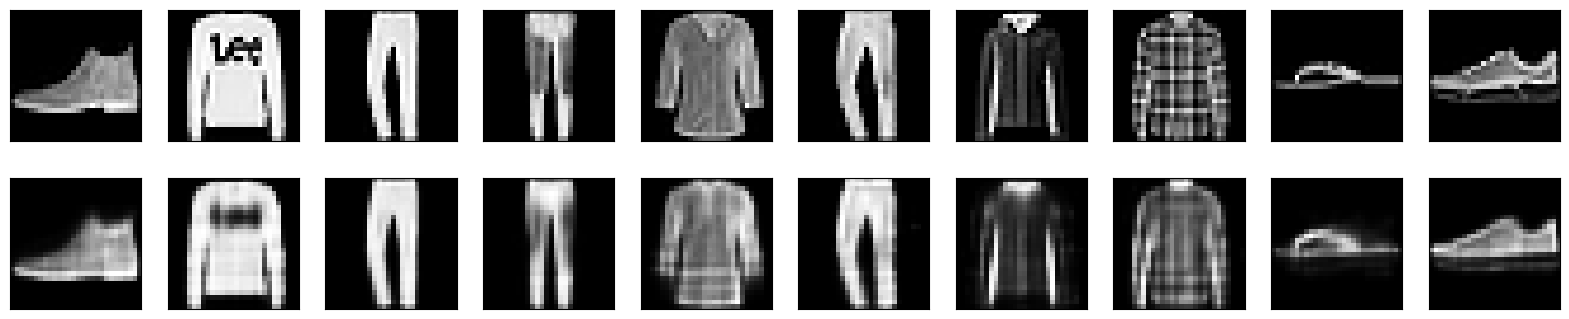

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 64    # Compress to 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import TerminateOnNaN

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set the number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan])  # Add the TerminateOnNaN callback

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Terminate on NaN results: finishes all 100 epochs

#ModelCheckpoint

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4711
Epoch 1: val_loss improved from inf to 0.32622, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4707 - val_loss: 0.3262
Epoch 2/50
220/235 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3181
Epoch 2: val_loss improved from 0.32622 to 0.30632, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3177 - val_loss: 0.3063
Epoch 3/50
218/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3005
Epoch 3: val_loss improved from 0.30632 to 0.29445, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3003 - val_loss: 0.2945
Epoch 4/50
217/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2909
Epoch 4: val_loss improved from 0.29445 to 0.28779, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2908 - val_loss: 0.2878
Epoch 5/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2848
Epoch

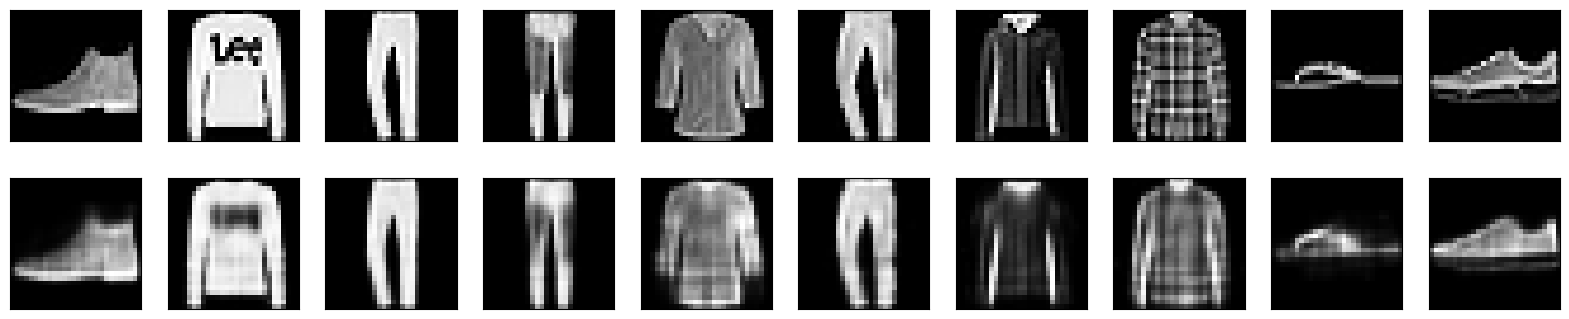

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 64    # Compress to 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[checkpoint])  # Add the ModelCheckpoint callback

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ModelCheckpoint results runs all 50 epochs and the 50th model was saved as the best

#ReduceLROnPlateau model

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4698 - val_loss: 0.3259 - learning_rate: 0.0010
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3175 - val_loss: 0.3050 - learning_rate: 0.0010
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2990 - val_loss: 0.2945 - learning_rate: 0.0010
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2905 - val_loss: 0.2882 - learning_rate: 0.0010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2850 - val_loss: 0.2844 - learning_rate: 0.0010
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2814 - val_loss: 0.2819 - learning_rate: 0.0010
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2793 - val_loss: 0.2802 - learning_rate: 0.0010
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s

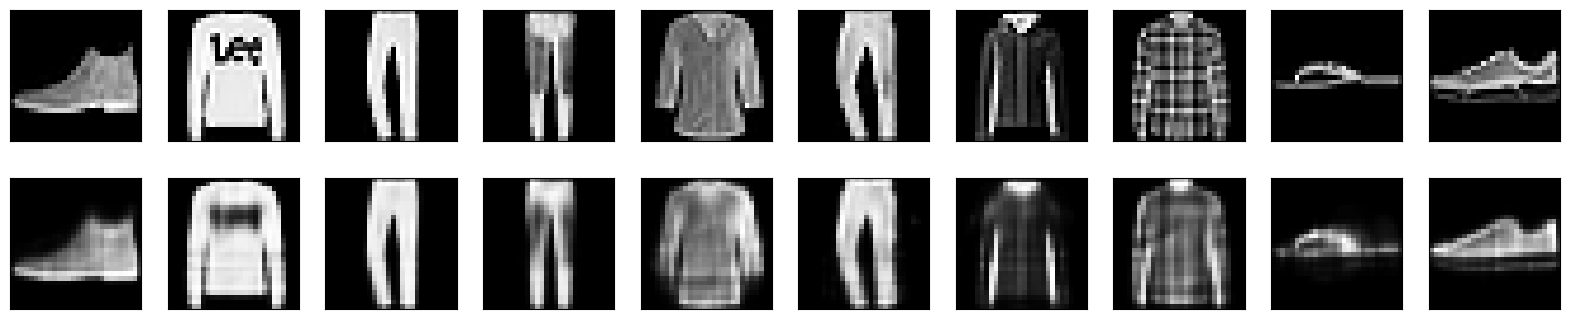

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 64    # Compress to 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[reduce_lr])  # Add the ReduceLROnPlateau callback

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ReduceLROnPlateau model results: runs all 50 Epochs, LR reduces from 0.001 to 5.0000e-04 to 2.5000e-04

#All 4 callback models together

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4701
Epoch 1: val_loss improved from inf to 0.32908, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4698 - val_loss: 0.3291 - learning_rate: 0.0010
Epoch 2/100
216/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3214
Epoch 2: val_loss improved from 0.32908 to 0.30706, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3208 - val_loss: 0.3071 - learning_rate: 0.0010
Epoch 3/100
216/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3018
Epoch 3: val_loss improved from 0.30706 to 0.29495, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3015 - val_loss: 0.2949 - learning_rate: 0.0010
Epoch 4/100
221/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2910
Epoch 4: val_loss improved from 0.29495 to 0.28869, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2909 - val_loss: 0.2

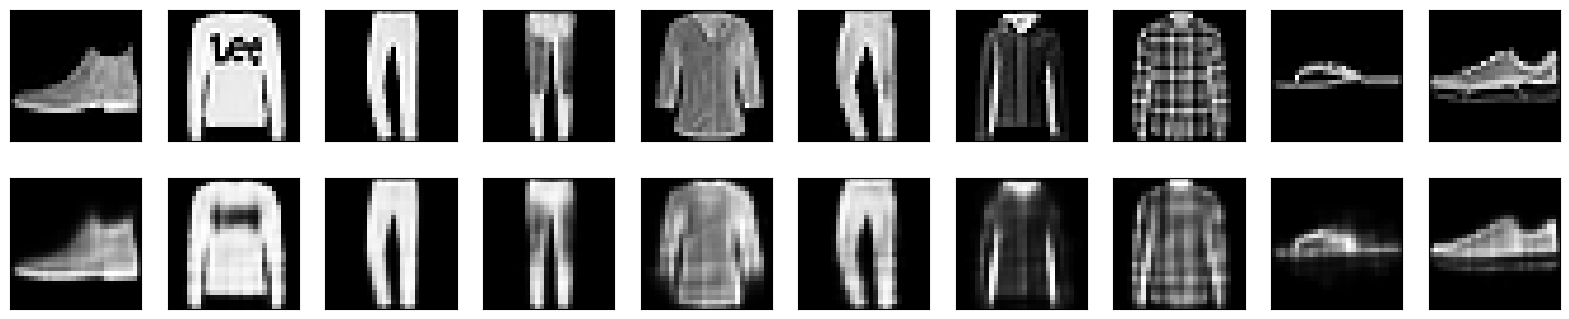

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 64    # Compress to 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TerminateOnNaN

# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras', monitor='val_loss', save_best_only=True, verbose=1)

# TerminateOnNaN callback to stop training if the loss becomes NaN
terminate_on_nan = TerminateOnNaN()

# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,  # You can set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[reduce_lr, early_stopping, checkpoint, terminate_on_nan])  # Using multiple callbacks


# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

all 4 callback functions results: all 100 epochs run, LR reduces all the way to 1.0000e-06, and the last model was saved as the best

#Loading the best model from the 4 callback function

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2745 - val_loss: 0.2723
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2737 - val_loss: 0.2722
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2729 - val_loss: 0.2721
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2725 - val_loss: 0.2721
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2725 - val_loss: 0.2721
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2734 - val_loss: 0.2720
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2716 - val_loss: 0.2720
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2719 - val_loss: 0.2719
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2718 - val_loss: 0.2720
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2729 - val_loss: 0.2720
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2728 - val_loss: 0.2719
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2721 - val_l

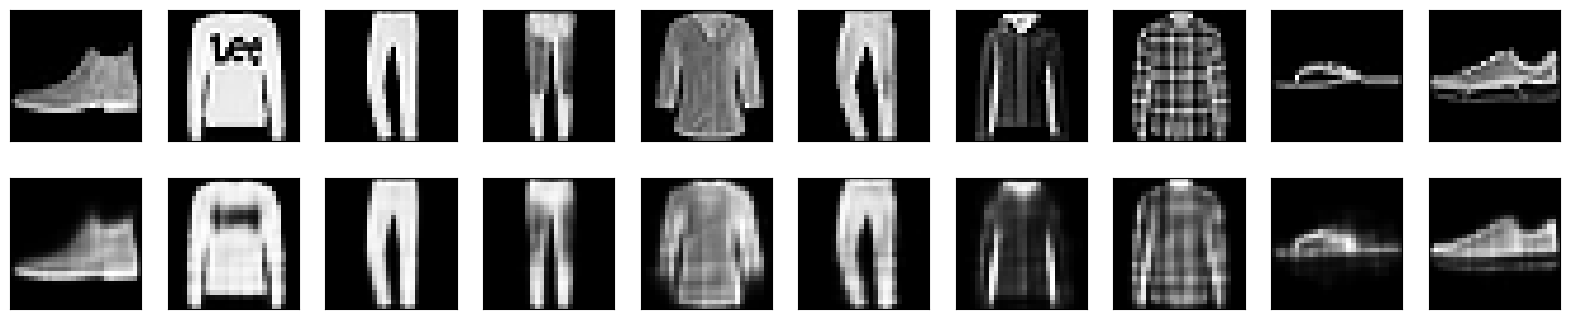

In [7]:
from tensorflow.keras.models import load_model




import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape


# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Load the entire model
best_autoencoder = load_model('autoencoder_best.keras')

# Compile the model
best_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
best_autoencoder.fit(x_test, x_test, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
